In [1]:
import os
HOME = os.getcwd()
print(HOME)

/Users/shreykhandelwal/Desktop/Internship/yt/yolov8


In [2]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1 CPU
Setup complete ✅ (8 CPUs, 16.0 GB RAM, 273.8/460.4 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display, Image

## Custom Training

In [4]:
!ls

Yolov8_object_detection_on_custom_dataset.ipynb
data.yaml
datasets
license-plate-detection--1
main.ipynb
mixdata
runs
yolov8n.pt
yolov8s.pt


In [5]:

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=200 imgsz=640 plots=True batch=24

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=200, patience=50, batch=24, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=

In [ ]:
!ls runs/detect/train3/

F1_curve.png
PR_curve.png
P_curve.png
R_curve.png
args.yaml
confusion_matrix.png
events.out.tfevents.1685021369.MacBook-Air.local.55076.0
results.csv
results.png
train_batch0.jpg
train_batch1.jpg
train_batch2.jpg
val_batch0_labels.jpg
val_batch0_pred.jpg
weights


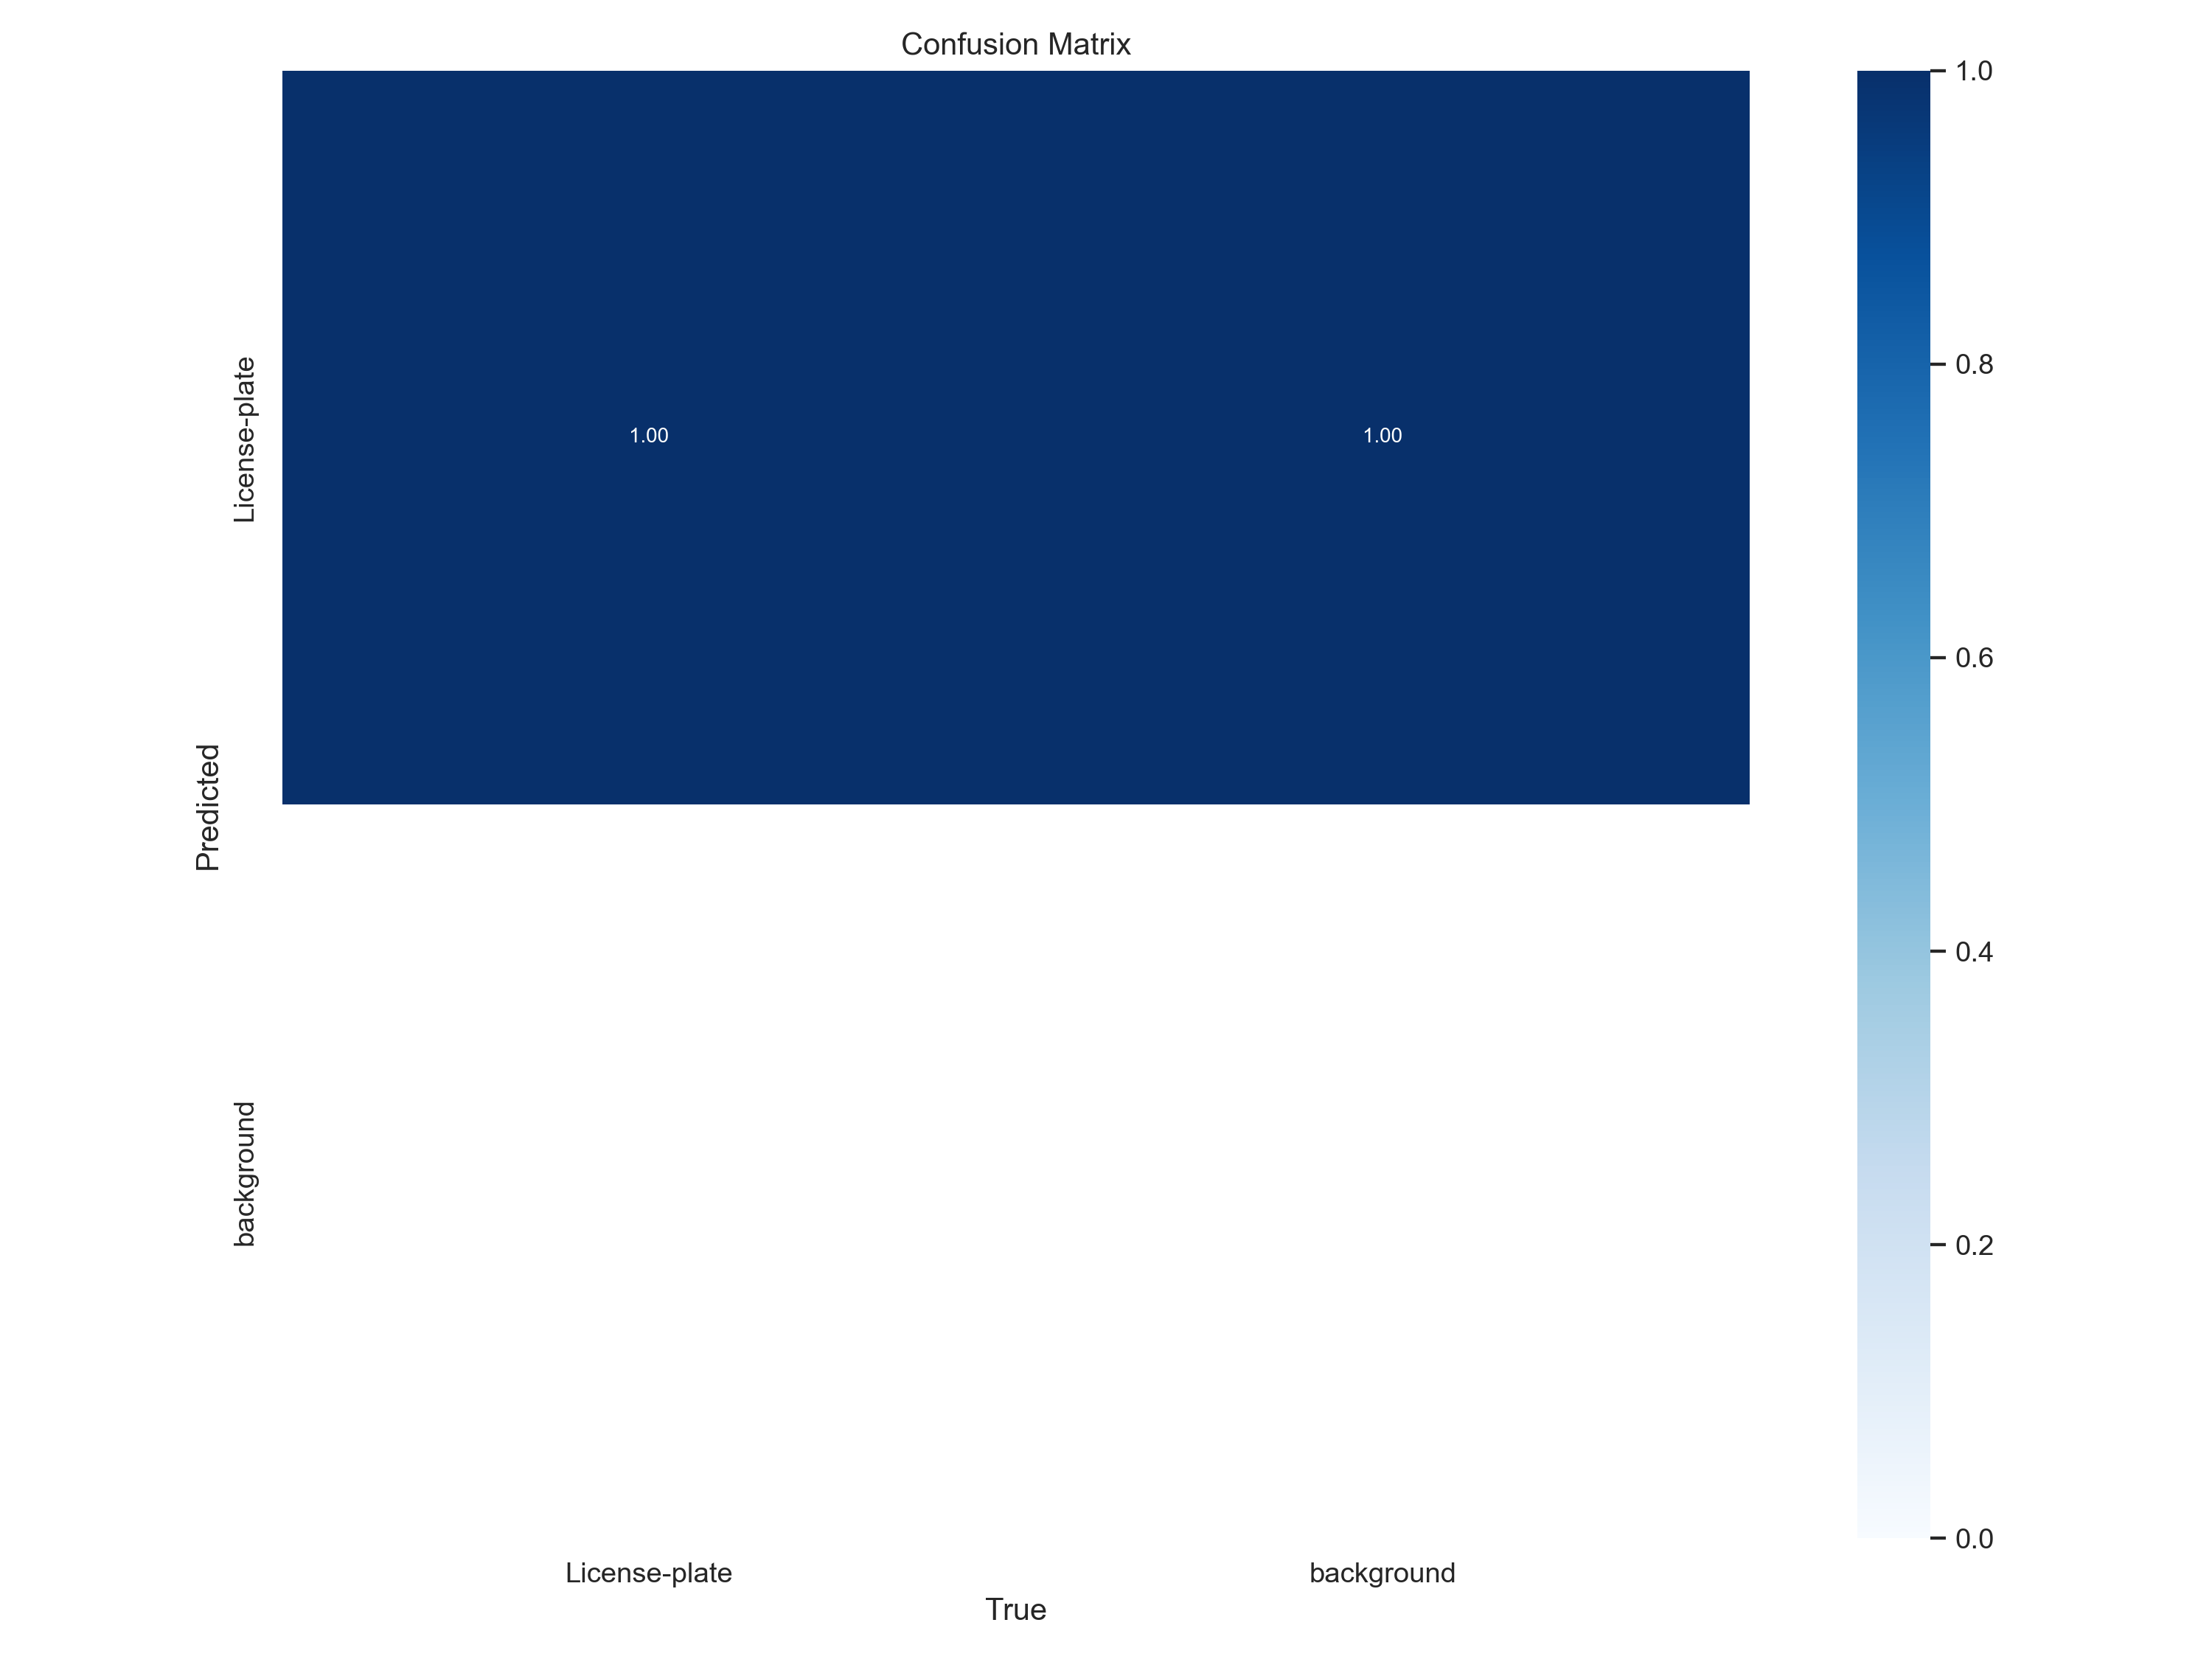

In [ ]:
Image(filename='runs/detect/train3/confusion_matrix.png', width=600)

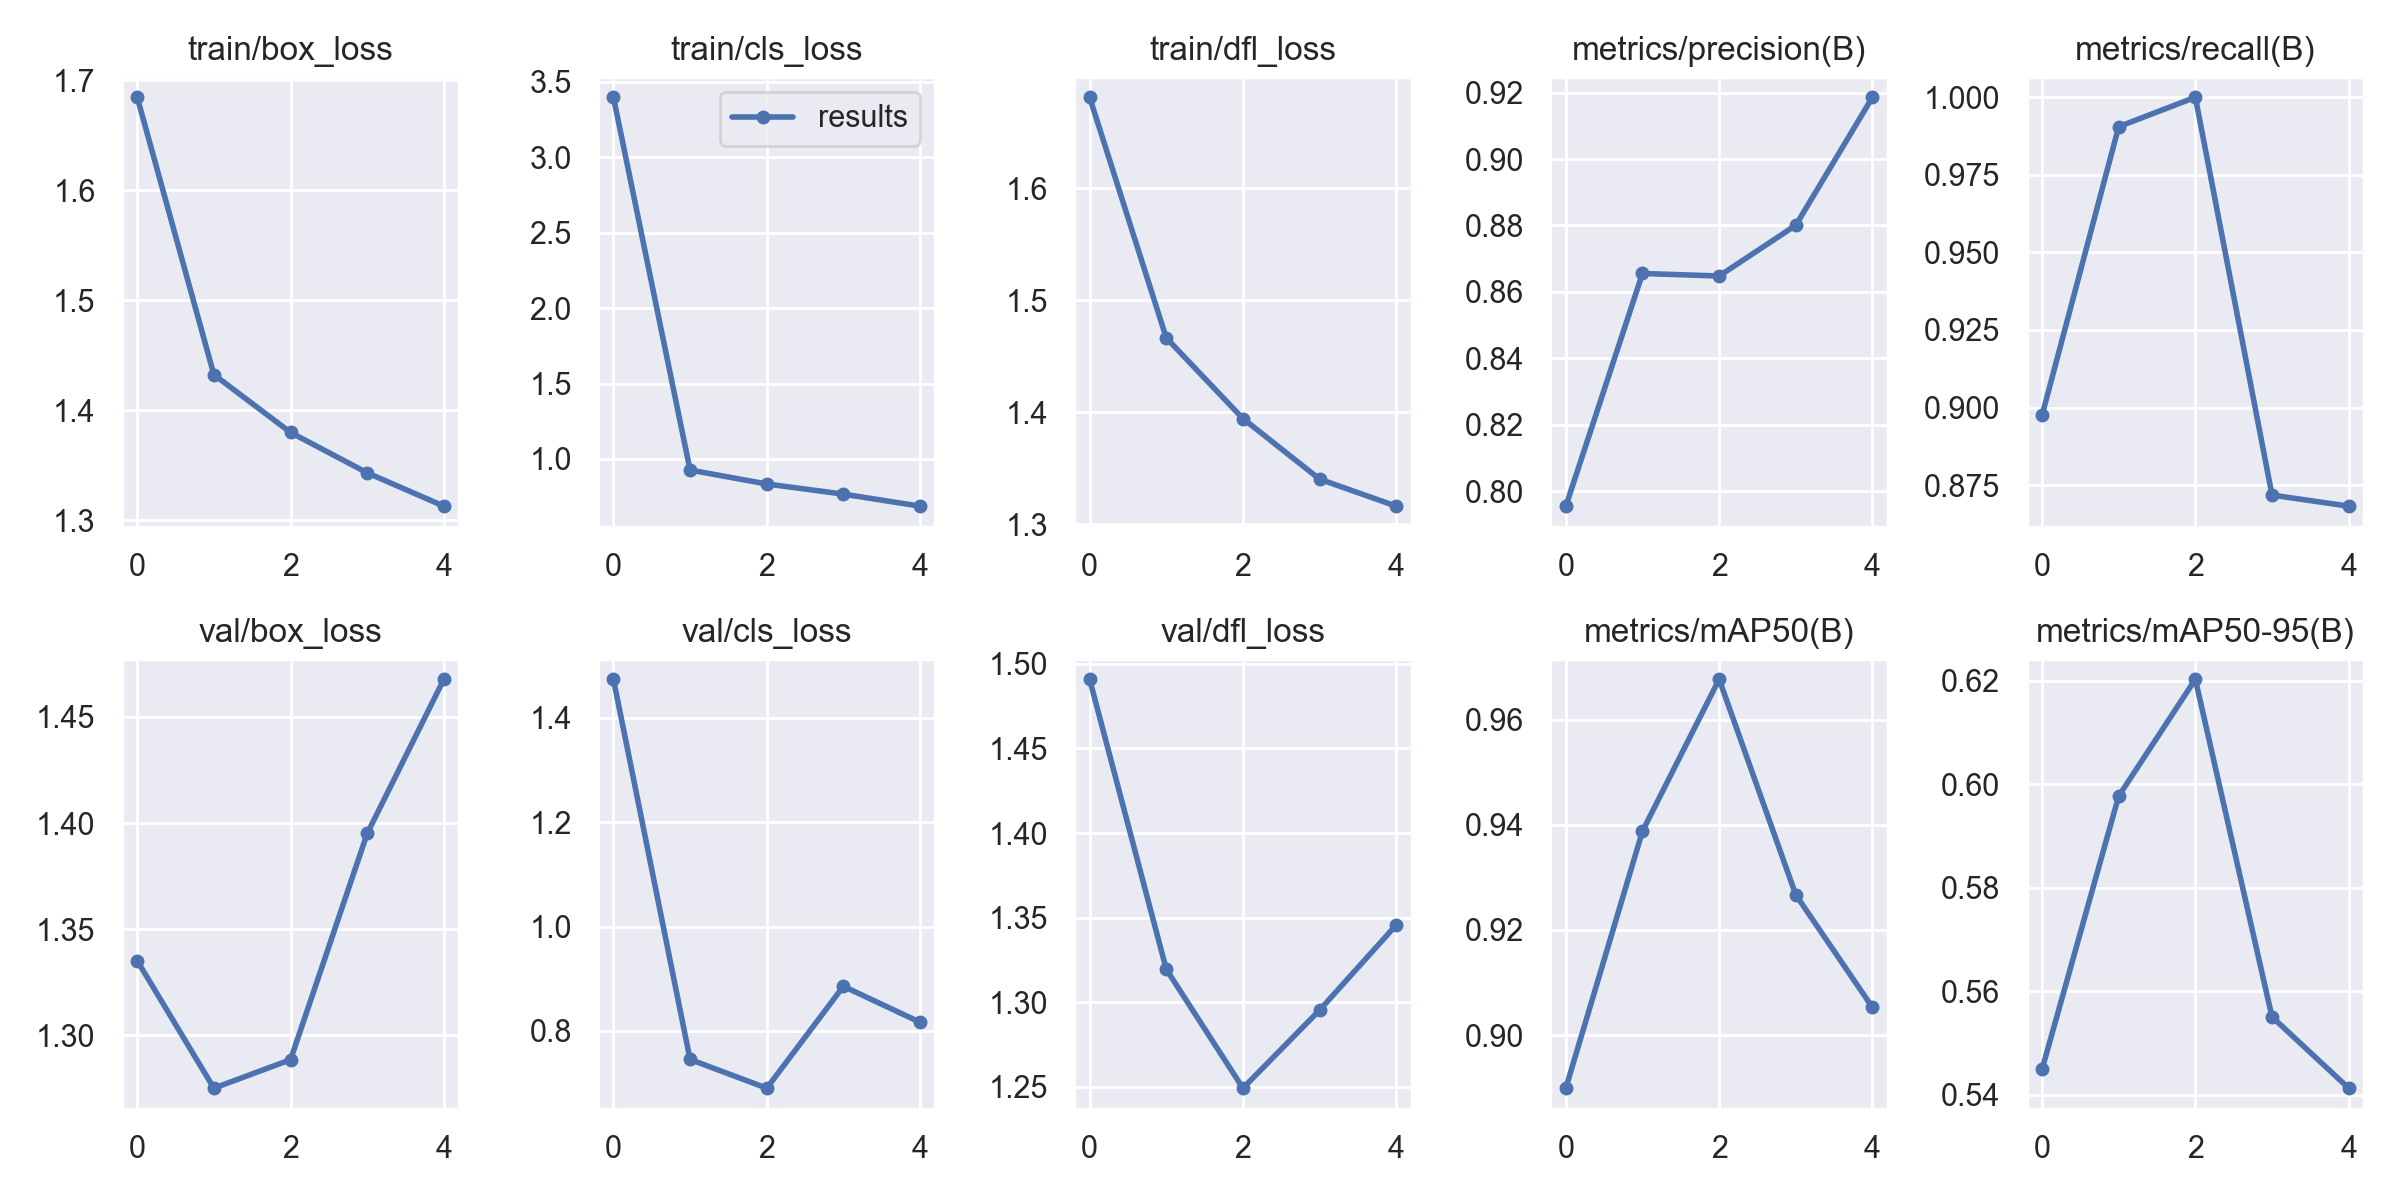

In [ ]:
Image(filename='runs/detect/train3/results.png', width=600)

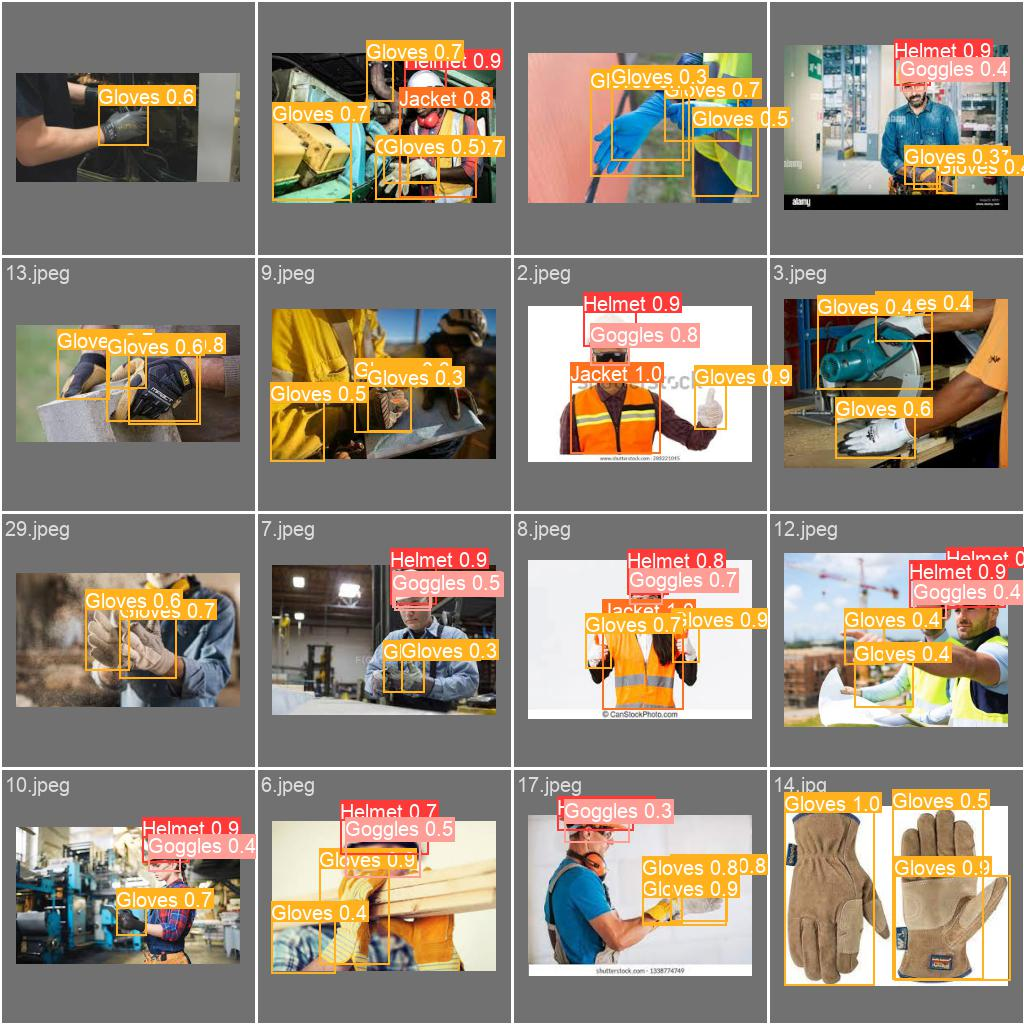

In [ ]:
Image(filename='runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
!yolo task=detect mode=val model=runs/detect/train3/weights/best.pt data=data.yaml

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /Users/shreykhandelwal/Desktop/Internship/yt/yolov8/datasets/valid
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 7, len(boxes) = 39. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         37         39      0.866          1      0.969      0.618
Speed: 1.2ms pre-process, 366.5ms inference, 0.0ms loss, 0.4ms post-process per image


In [ ]:
!yolo task=detect mode=predict model=runs/detect/train3/weights/best.pt conf=0.35 source=datasets/test/images

Ultralytics YOLOv8.0.20 🚀 Python-3.10.11 torch-2.0.1 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
image 1/20 /Users/shreykhandelwal/Desktop/Internship/yt/yolov8/datasets/test/images/image_0009_jpg.rf.69c3f5b1dc1af7c0741b11ea54dd49c8.jpg: 640x640 1 License-plate, 141.4ms
image 2/20 /Users/shreykhandelwal/Desktop/Internship/yt/yolov8/datasets/test/images/image_0013_jpg.rf.cee1d742c1f9050dfdda4b991bed6d8b.jpg: 640x640 1 License-plate, 135.0ms
image 3/20 /Users/shreykhandelwal/Desktop/Internship/yt/yolov8/datasets/test/images/image_0025_jpg.rf.9e9ad5ac833f3b697b4a6cdd59984104.jpg: 640x640 1 License-plate, 133.2ms
image 4/20 /Users/shreykhandelwal/Desktop/Internship/yt/yolov8/datasets/test/images/image_0033_jpg.rf.5eb0f0c1b2a31c4b393169352ff268b5.jpg: 640x640 1 License-plate, 138.6ms
image 5/20 /Users/shreykhandelwal/Desktop/Internship/yt/yolov8/datasets/test/images/image_0040_jpg.rf.f94f9ee1d69fd663fa0cef8e7efc1ab8.jpg: 640x640 1 License-plate, 139.3

**NOTE:** Let's take a look at few results.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")